# **Titanic Notebook**

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed

# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python

# For example, here's several helpful packages to load



import numpy as np # linear algebra

import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)



# We'll also import seaborn, a Python graphing library

import warnings # current version of seaborn generates a bunch of warnings that we'll ignore

warnings.filterwarnings("ignore")

import seaborn as sns



# Input data files are available in the read-only "../input/" directory

# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory



import os

for dirname, _, filenames in os.walk('/kaggle/input'): # cloud

#for dirname, _, filenames in os.walk('./data_titanic'): # local

    for filename in filenames:

        print(os.path.join(dirname, filename))



# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 

# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/molmo/pytorch/molmoe-1b-0924/1/modeling_molmoe.py
/kaggle/input/molmo/pytorch/molmoe-1b-0924/1/config.json
/kaggle/input/molmo/pytorch/molmoe-1b-0924/1/molmo_logo.png
/kaggle/input/molmo/pytorch/molmoe-1b-0924/1/preprocessing_molmo.py
/kaggle/input/molmo/pytorch/molmoe-1b-0924/1/preprocessor_config.json
/kaggle/input/molmo/pytorch/molmoe-1b-0924/1/README.md
/kaggle/input/molmo/pytorch/molmoe-1b-0924/1/tokenizer.json
/kaggle/input/molmo/pytorch/molmoe-1b-0924/1/tokenizer_config.json
/kaggle/input/molmo/pytorch/molmoe-1b-0924/1/config_molmoe.py
/kaggle/input/molmo/pytorch/molmoe-1b-0924/1/pytorch_model.bin
/kaggle/input/molmo/pytorch/molmoe-1b-0924/1/processor_config.json
/kaggle/input/molmo/pytorch/molmoe-1b-0924/1/special_tokens_map.json
/kaggle/input/molmo/pytorch/molmoe-1b-0924/1/example.py
/kaggle/input/molmo/pytorch/molmoe-1b-0924/1/.gitattributes
/kaggle/input/molmo/pytorch/molmoe-1b-0924/1/image_preprocessing_molmo.py
/kaggle/input/molmo/pytorch/molmoe-1b-0924/1/add

In [2]:
train_data = pd.read_csv("/kaggle/input/titanic/train.csv") # cloud

#train_data = pd.read_csv("./data_titanic/train.csv") # local

train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test_data = pd.read_csv("/kaggle/input/titanic/test.csv") # cloud

#test_data = pd.read_csv("./data_titanic/test.csv") # local

test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


**Columns Name, Sex, Ticket, Cabin, Embarked cannot be used by seaborn pairplot because they are Objects.**

In [5]:
women = train_data.loc[train_data.Sex == 'female']["Survived"]

rate_women = sum(women)/len(women)



print("% of women who survived:", rate_women)

% of women who survived: 0.7420382165605095


In [6]:
print(sum(women))

233


In [7]:
print(len(women))

314


In [8]:
men = train_data.loc[train_data.Sex == 'male']["Survived"]

rate_men = sum(men)/len(men)

print("% of men who survived:", rate_men)

% of men who survived: 0.18890814558058924


In [9]:
# Replacing 'female' with 2 and 'male' (otherwise) with 1 in the 'Sex' column

# Thus seaborn pairplot can handle Sex because it becomes int32 instead of Object

train_data["Sex"] = np.where(train_data["Sex"] == "female", 2, 1)

test_data["Sex"] = np.where(test_data["Sex"] == "female", 2, 1)

train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(6), object(4)
memory usage: 83.7+ KB


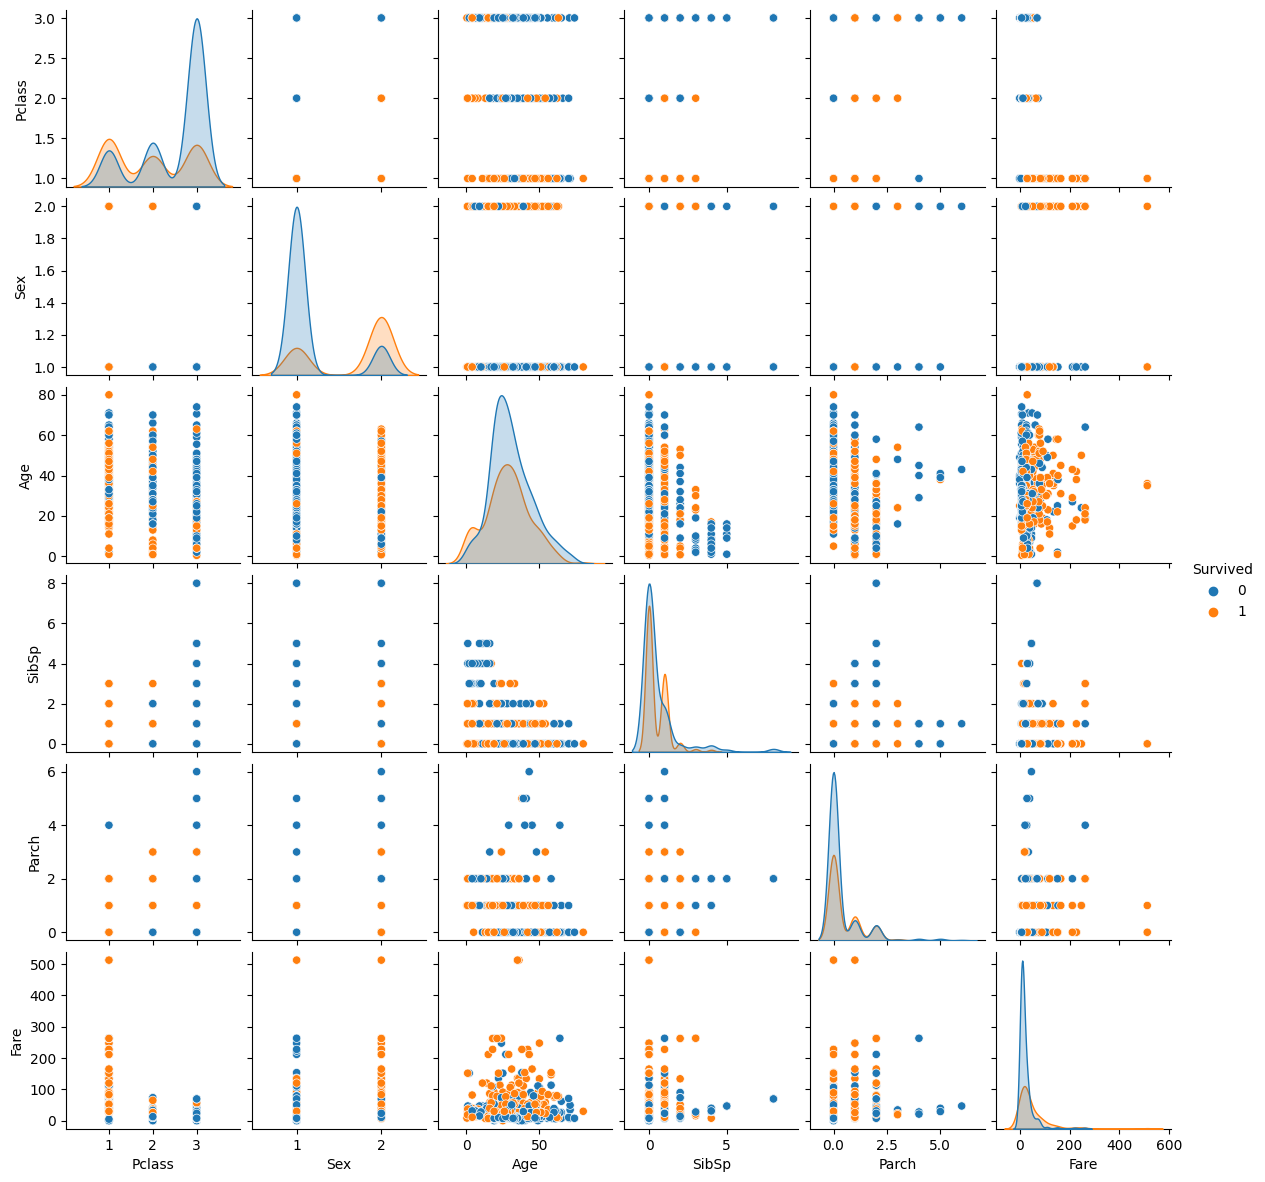

In [10]:
# The diagonal elements in a pairplot show the histogram by default

# We can update these elements to show other things, such as a kde

sns.pairplot(train_data.drop("PassengerId", axis=1), hue="Survived", size=2, diag_kind="kde")

In [13]:
from sklearn.ensemble import RandomForestClassifier



y = train_data["Survived"]



#features = ["Pclass", "Sex", "SibSp", "Parch", "Age", "Fare"]
features = ["Sex"]

X = pd.get_dummies(train_data[features])

X_test = pd.get_dummies(test_data[features])



model = RandomForestClassifier(n_estimators=500, max_depth=10, random_state=13353)

model.fit(X, y)

import joblib
joblib.dump(model, 'model.pkl')


predictions = model.predict(X_test)



output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})

output.to_csv('submission.csv', index=False)

print("Your submission was successfully saved!")

Your submission was successfully saved!
